# Excitation analysis

## Table of contents
<a name="toc"></a>
1. [Importing needed libraries](#import)
2. [Overview of required files](#required_files)
3. [Excitation analysis](#exc_analysis)
   
### A. Learning objectives

* To be able to plot the average CI coefficients

### B. Use cases


* [Excitation analysis](#exc_analysis)


### C. Functions

- `libra_py`
  - `packages`
    - `cp2k`
      - `methods`
        - [`exc_analysis`](#exc_analysis)
  - `units`
    - `au2ev`

## 1. Importing needed libraries <a name="import"></a>
[Back to TOC](#toc)

Import `numpy`, `matplotlib.pyplot`, and `CP2K_methods`.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import libra_py.packages.cp2k.methods as CP2K_methods

/projects/academic/alexeyak/mohammad/software/mc/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/alexeyak/mohammad/software/mc/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/alexeyak/mohammad/software/mc/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: R

## 2. Overview of required files <a name="required_files"></a>
[Back to TOC](#toc)

All of the pdos files are stored in this folder:

* `data/all_logfiles`

## 3. Excitation analysis <a name="exc_analysis"></a>
[Back to TOC](#toc)

Here, we average the CI coefficients for each TD-DFT excited states over the MD trajectory. This shows the excited states degree of mixing. This code is adopted from [here](https://github.com/AkimovLab/Project_CsPbI3_MB_vs_SP/blob/master/cubic/excitation_analysis/excitation_analysis.py) written by Dr. Brendan Smith with some modifications.

The parameters needs to be defined in a dictionary, `params`, as follows:

`nsds`: Number of SDs to be considered for each excited state.

`colors`: The colors which are in order of the SDs. For example, the `green` color is for the first excitation that appears in the excited states analysis section in CP2K log files.

`isUKS`: I set to `1`, unrestricted spin calculations is considered.

`tolerance`: A value for reading the excited states CI coefficients.

`number_of_states`: Number of excited states requested in the CP2K input file.

The black lines show the error bars which are computed with a confidence interval coefficient of 1.96 which shows the confidence interval of $95\%$. The error bars are computed as follows:

$$\epsilon=Z\frac{s}{\sqrt{N}}$$

where $Z$ is the confidence interval coefficient, $s$ is the standard deviation of the $c_i^2$ values, and $N$ is the number of samples. We will use this formula over the tutorials for step4 as well.

<IPython.core.display.Javascript object>


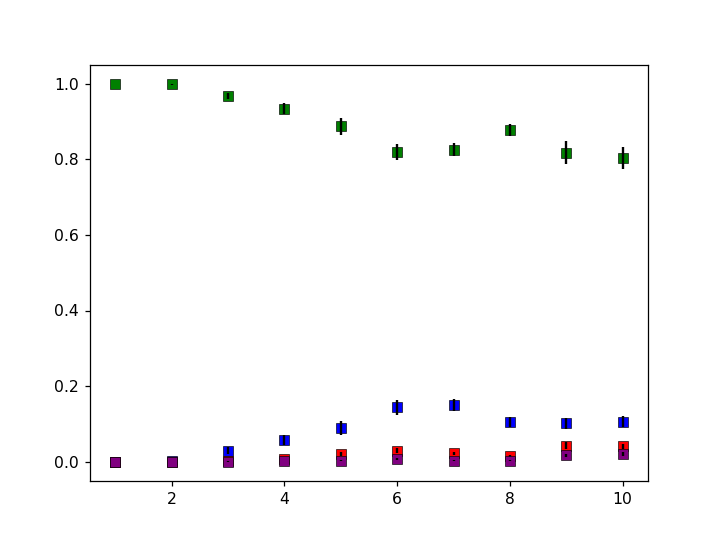

In [2]:
%matplotlib notebook
params = {"path_to_logfiles": "data/all_logfiles", "number_of_states": 10, "tolerance": 0.01,
         "isUKS": 0, "nsds": 4}
colors = ['green','blue','red','purple']
coeffs_avg, coeffs_error = CP2K_methods.exc_analysis(params)
for state in range(len(coeffs_avg)):
    for sd in range(params["nsds"]):
        plt.plot(state+1, coeffs_avg[state][sd], color="black", marker='s', markerfacecolor=colors[sd],
                 markeredgewidth=0.4, markersize=7)
        plt.errorbar( state+1, coeffs_avg[state][sd], yerr=coeffs_error[state][sd], color='black')